In [2]:
# 📦 Required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ✅ Load CSV file
df = pd.read_csv('measures_v2.csv')  # Replace with your path if not on Colab

# ✅ Drop non-numeric or irrelevant columns (based on your previous EDA)
# Let's drop columns with weak correlation to temperature
drop_columns = ['ambient', 'u_d']  # These showed low correlation previously
df = df.drop(columns=drop_columns)

# ✅ Encode any remaining categorical columns (e.g., "coolant" had values like 'Low')
if df['coolant'].dtype == object:
    df['coolant'] = df['coolant'].map({'Low': 0, 'Medium': 1, 'High': 2})

# ✅ Drop rows with missing or NaN values
df = df.dropna()

# ✅ Define features (X) and target (y)
target_column = 'stator_winding'  # Change if you're targeting another temp
X = df.drop(columns=[target_column, 'pm', 'stator_yoke', 'stator_tooth'])  # Don't include other temperatures
y = df[target_column]


In [3]:
# ✅ Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [5]:
!pip install tensorflow --quiet


In [6]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Normalize input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output: predicted temperature
])

# Compile
model.compile(optimizer='adam', loss='mse')

# Train
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Predict
y_pred_nn = model.predict(X_test).flatten()

# Evaluate
r2_nn = r2_score(y_test, y_pred_nn)
rmse_nn = mean_squared_error(y_test, y_pred_nn, squared=False)

print(f"📈 Neural Network (MLP)")
print(f"✅ R² Score: {r2_nn}")
print(f"✅ RMSE: {rmse_nn}")


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8318/8318 ━━━━━━━━━━━━━━━━━━━━ 1s 169us/step
📈 Neural Network (MLP)
✅ R² Score: 0.9065121428564884
✅ RMSE: 8.765374961012414


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


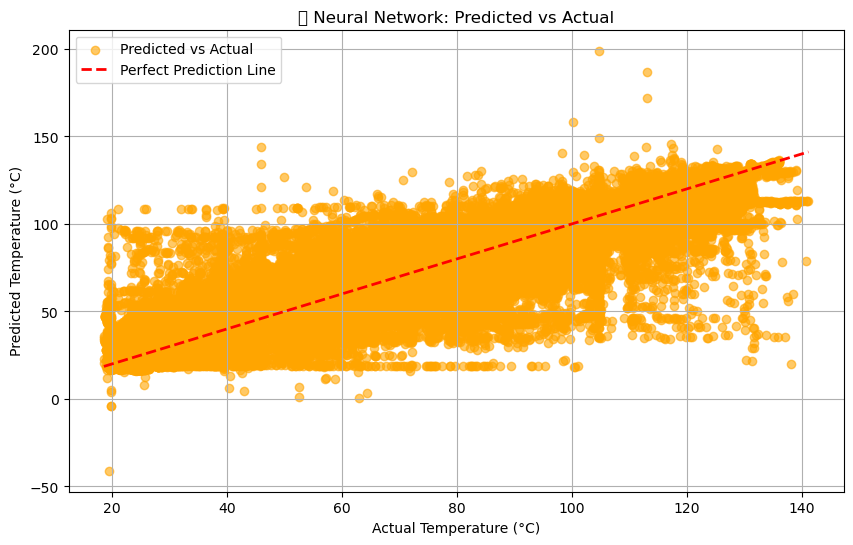

In [8]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, color='orange', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('🧠 Neural Network: Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()
